## Time Series feature Exploration
### Experiments with Tree-based Scikit-learn models

**Objective**: The primary objective of this notebook is to perform experimentation with the tree-based models for multi-step ahead forecasting.



In [1]:
import sys
import os

# Get the directory of the current notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))  # Use __file__ for portability

# Move up one level to the project root
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))

# Change working directory
os.chdir(project_root)

# Verify the change
print(os.getcwd()) 

/home/michel/projects/tree-based-forecasting-boilerplate


In [11]:
%load_ext autoreload
%autoreload 2
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from scripts.run_wfv import *
from src.models.train_model import *
from src.models.evaluate_model import *
from src.models.predict_model import *
from src.visualization.data_viz import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
df = pd.read_csv(os.path.join('./data/raw', 'AirPassengers.csv'), parse_dates=["Month"])

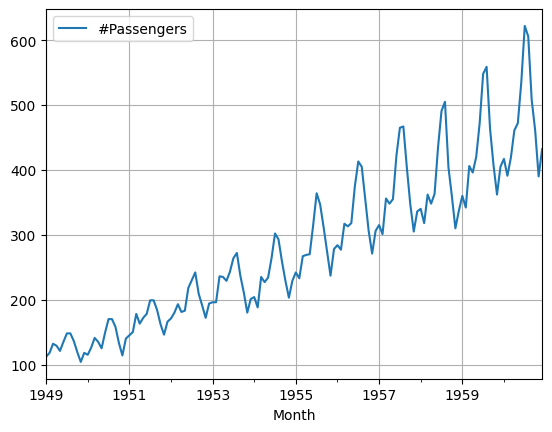

In [10]:
df.set_index("Month").plot()
plt.grid()
plt.show()

## 1.0 Seasonality and Trend removal

In [16]:
df = df.set_index("Month")

In [24]:
# In a monthly dataset the seasonality tends to be 12 periods - yearly seasonality
result = seasonal_decompose(df['#Passengers'], model='additive', period=12) # period = 7 for weekly seasonality
df['#Passengers_DETRENDED'] = df['#Passengers'] - result.trend
df['#Passengers_DESEASONALIZED'] = df['#Passengers'] - result.seasonal
df['#Passengers_Diff_1'] = df['#Passengers'].diff()
df['#Passengers_Diff_12'] = df['#Passengers'].diff(12)
df.head()

,#Passengers,#Passengers_DETRENDED,#Passengers_DESEASONALIZED,#Passengers_Diff_1,#Passengers_Diff_12
Month,,,,,
1949-01-01,112,NaN,136.748737,NaN,NaN
1949-02-01,118,NaN,154.188131,6.0,NaN
1949-03-01,132,NaN,134.241162,14.0,NaN
1949-04-01,129,NaN,137.036616,-3.0,NaN
1949-05-01,121,NaN,125.506313,-8.0,NaN


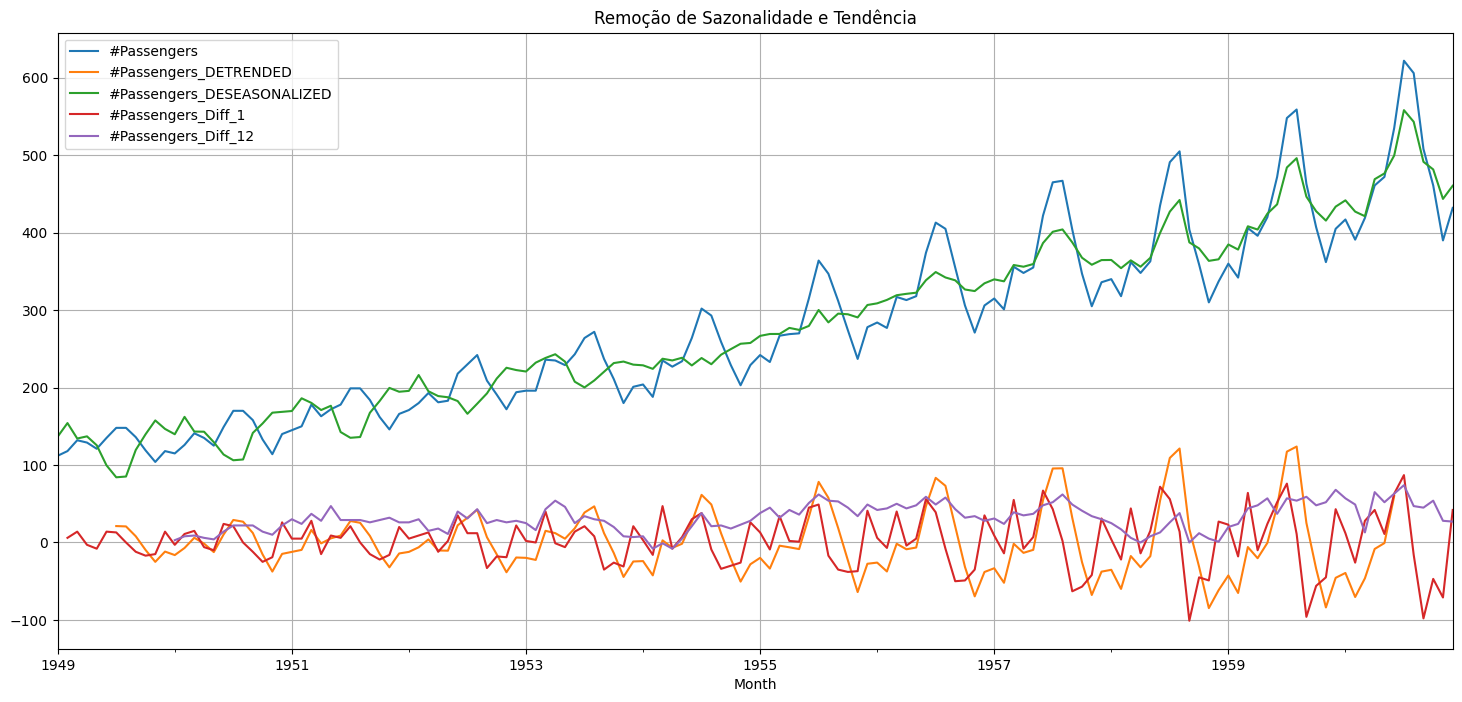

In [27]:
df.plot(figsize=(18, 8))
plt.title("Remoção de Sazonalidade e Tendência")
plt.grid()
plt.show()

In [28]:
df2 = df.copy()
# STL decomposition
stl = STL(df['#Passengers'], period=12)
res = stl.fit()
df2['#Passengers_DETRENDED'] = df2['#Passengers'] - res.trend
df2['#Passengers_DESEASONALIZED'] = df2['#Passengers'] - res.seasonal

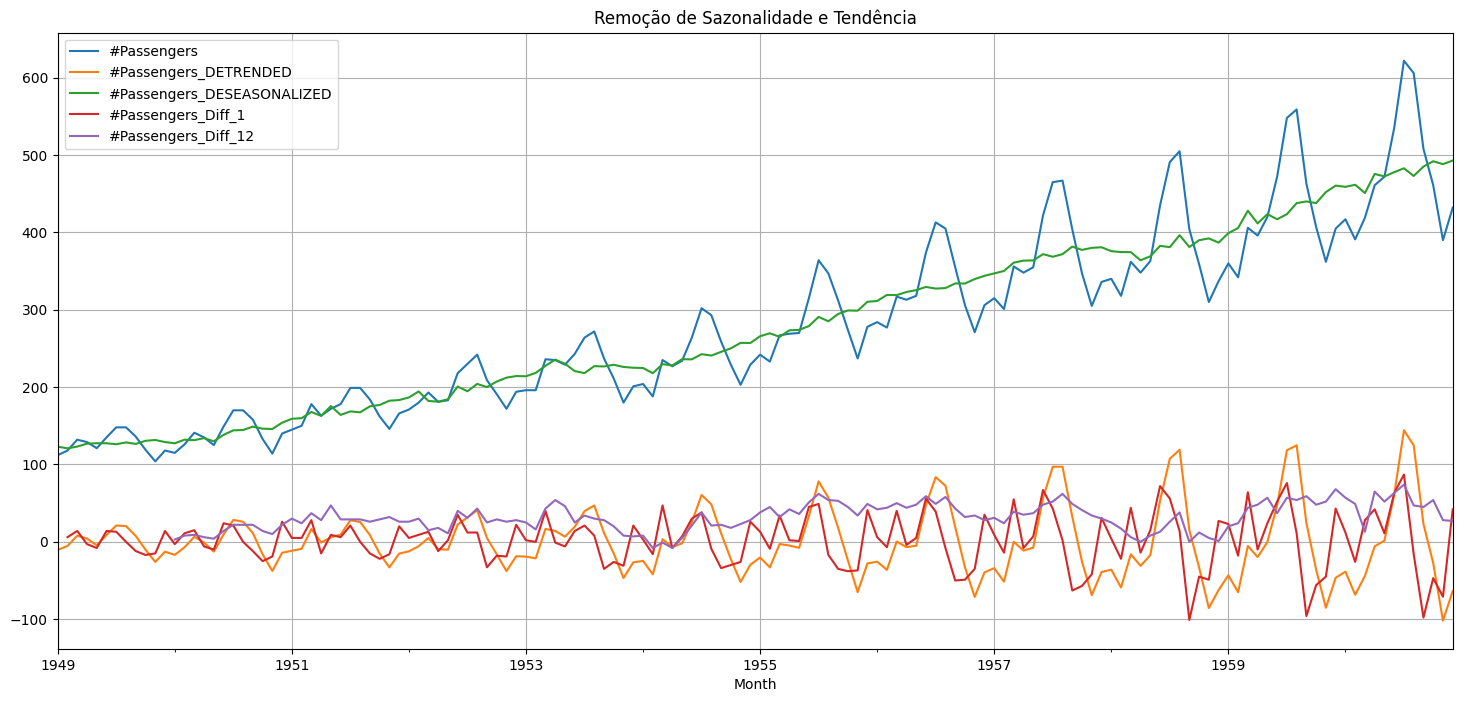

In [29]:
df2.plot(figsize=(18, 8))
plt.title("Remoção de Sazonalidade e Tendência")
plt.grid()
plt.show()